In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

train = pd.read_csv("C:/Users/Ank/Desktop/bigMart/Train_UWu5bXk.csv")
test = pd.read_csv("C:/Users/Ank/Desktop/bigMart/Test_u94Q5KV.csv")
print(train.head())
print(test.head())
print()
print(train.shape)
print(test.shape)

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [3]:
print(train.isnull().sum())
print()
print(test.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [4]:
full_data = [train,test]
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
X_train = train[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]
Y_train = train['Item_Outlet_Sales']
X_test = test[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


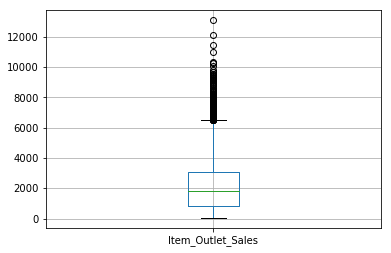

In [8]:
train.boxplot('Item_Outlet_Sales')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001589C497780>]], dtype=object)

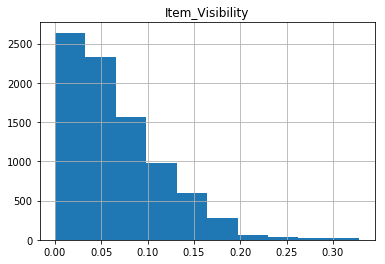

In [9]:
train.hist('Item_Visibility')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000158E4B0DBA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000158E9523D68>]], dtype=object)

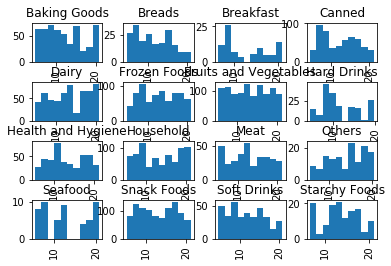

In [20]:
train.hist(column='Item_Weight', by='Item_Type')

In [13]:
for data in full_data:
    print(data['Item_Fat_Content'].value_counts())
    print(data['Item_Type'].value_counts())
    print(data['Outlet_Identifier'].value_counts())
    print(data['Outlet_Establishment_Year'].value_counts())
    print(data['Outlet_Size'].value_counts())
    print(data['Outlet_Location_Type'].value_counts())
    print(data['Outlet_Type'].value_counts())
    print()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64
Medium    2793
Small     2388
Hi

In [17]:
train_wt_null = train["Item_Identifier"][train["Item_Weight"].isnull()]
train_wt_null

7       FDP10
18      DRI11
21      FDW12
23      FDC37
29      FDC14
36      FDV20
38      FDX10
39      FDB34
49      FDS02
59      FDI26
62      FDF09
63      FDY40
64      FDY45
77      FDN48
83      NCL18
84      FDR12
87      FDQ49
95      FDU04
98      NCP18
101     FDD10
108     DRE60
112     FDW39
113     FDX34
130     FDY25
132     NCR53
136     FDH35
153     DRK12
161     FDR07
168     NCB30
178     DRY23
        ...  
8349    FDN15
8351    NCE43
8353    NCX41
8356    FDN45
8358    FDK27
8362    FDY37
8367    FDA32
8372    FDA01
8373    FDX44
8375    NCM05
8383    NCQ54
8390    NCQ05
8404    DRH39
8405    FDB09
8422    FDD08
8435    FDT48
8442    FDX40
8444    FDO28
8449    FDG02
8454    NCH54
8458    FDX20
8463    FDG59
8469    FDQ45
8472    NCS41
8480    FDQ58
8485    DRK37
8487    DRG13
8488    NCN14
8490    FDU44
8504    NCN18
Name: Item_Identifier, Length: 1463, dtype: object

In [22]:
train_wt_FDP10 = train[["Item_Weight","Item_Identifier","Outlet_Identifier"]][train["Item_Identifier"]=="FDP10"]
train_wt_FDP10

,Item_Weight,Item_Identifier,Outlet_Identifier
7,NaN,FDP10,OUT027
585,19.0,FDP10,OUT035
2623,19.0,FDP10,OUT017
3382,19.0,FDP10,OUT049
4585,19.0,FDP10,OUT046
6087,19.0,FDP10,OUT045
7883,19.0,FDP10,OUT013


In [29]:
train_Outlet_Size = train["Outlet_Identifier"][train["Outlet_Size"].isnull()]
train_Outlet_Size.value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [30]:
train_ol_OUT010 = train[['Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']][train["Outlet_Identifier"]=="OUT017"]
print(train_ol_OUT010)
print()
train_ol_OUT045 = train[['Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']][train["Outlet_Identifier"]=="OUT045"]
print(train_ol_OUT045)

     Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
9               OUT017                       2007         NaN   
25              OUT017                       2007         NaN   
53              OUT017                       2007         NaN   
54              OUT017                       2007         NaN   
73              OUT017                       2007         NaN   
78              OUT017                       2007         NaN   
85              OUT017                       2007         NaN   
111             OUT017                       2007         NaN   
116             OUT017                       2007         NaN   
118             OUT017                       2007         NaN   
120             OUT017                       2007         NaN   
124             OUT017                       2007         NaN   
127             OUT017                       2007         NaN   
138             OUT017                       2007         NaN   
141             OUT017   